In [1]:

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [2]:
#creating dataset
n_pts = 100
#centers of our two clusters
centers = [[-0.5, 0.5], [0.5, -0.5]]
#cluster_std if == 0 means every point at center and as go up the points will have more distance
#from centers
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])


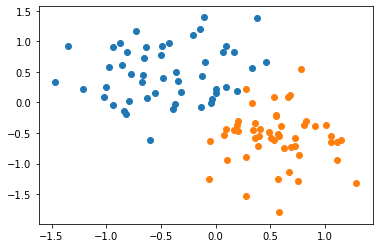

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__() 
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = torch.sigmoid(self.linear(x))
        return pred
    def predict(self,x):
        pred=self.forward(x)
        if pred >=0.5:
            return 1
        else:
            return 0
    

In [6]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))
#first two are w1 and w2 and second one is bias

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [7]:
[w, b] = model.parameters()
#view as tuple containg two elements
w1, w2 = w.view(2)
b1=b[0]
#now we obtain them as tensor types
print(w1,w2,b1)
#for viewing them as python numbers we do the following:
def get_params():
    return (w1.item(), w2.item(), b[0].item())


tensor(0.1622, grad_fn=<SelectBackward>) tensor(-0.1683, grad_fn=<SelectBackward>) tensor(0.1939, grad_fn=<SelectBackward>)


In [8]:
def plot_fit(title):
    plt.title = title
    w1, w2, b1 = get_params()
    x1 = np.array([-2, 2])
    x2 = (w1*x1 + b1)/(-w2)
    plt.plot(x1, x2, 'r')
    scatter_plot()
    plt.show()
    

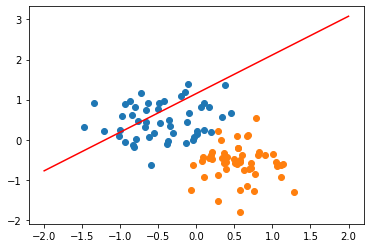

In [9]:
plot_fit('Initial Model')

In [10]:
#as we have two classes we use binary cross entropy
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
#train
epochs = 1000
losses = []

for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423914909363
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.6122783422470093
epoch: 7 loss: 0.6112514734268188
epoch: 8 loss: 0.6102279424667358
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.6071776747703552
epoch: 12 loss: 0.606167733669281
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.604157567024231
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.5991897583007812
epoch: 20 loss: 0.5982059836387634
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962479710578918
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705697059631
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.590450882911682

epoch: 229 loss: 0.4477144181728363
epoch: 230 loss: 0.4471950829029083
epoch: 231 loss: 0.4466770887374878
epoch: 232 loss: 0.44616058468818665
epoch: 233 loss: 0.4456455111503601
epoch: 234 loss: 0.4451318383216858
epoch: 235 loss: 0.4446195662021637
epoch: 236 loss: 0.4441086947917938
epoch: 237 loss: 0.4435991942882538
epoch: 238 loss: 0.44309109449386597
epoch: 239 loss: 0.4425843358039856
epoch: 240 loss: 0.44207900762557983
epoch: 241 loss: 0.44157516956329346
epoch: 242 loss: 0.441072553396225
epoch: 243 loss: 0.44057127833366394
epoch: 244 loss: 0.4400714635848999
epoch: 245 loss: 0.43957290053367615
epoch: 246 loss: 0.439075767993927
epoch: 247 loss: 0.4385799765586853
epoch: 248 loss: 0.43808552622795105
epoch: 249 loss: 0.43759238719940186
epoch: 250 loss: 0.4371006488800049
epoch: 251 loss: 0.4366101324558258
epoch: 252 loss: 0.4361208975315094
epoch: 253 loss: 0.4356330633163452
epoch: 254 loss: 0.4351465702056885
epoch: 255 loss: 0.4346613585948944
epoch: 256 loss: 0.434

epoch: 454 loss: 0.35876137018203735
epoch: 455 loss: 0.35846221446990967
epoch: 456 loss: 0.3581636846065521
epoch: 457 loss: 0.3578657805919647
epoch: 458 loss: 0.3575685918331146
epoch: 459 loss: 0.35727202892303467
epoch: 460 loss: 0.3569760024547577
epoch: 461 loss: 0.356680691242218
epoch: 462 loss: 0.3563860356807709
epoch: 463 loss: 0.3560919463634491
epoch: 464 loss: 0.35579854249954224
epoch: 465 loss: 0.35550570487976074
epoch: 466 loss: 0.35521361231803894
epoch: 467 loss: 0.3549220561981201
epoch: 468 loss: 0.3546311557292938
epoch: 469 loss: 0.3543408513069153
epoch: 470 loss: 0.35405123233795166
epoch: 471 loss: 0.3537622392177582
epoch: 472 loss: 0.3534737825393677
epoch: 473 loss: 0.3531860113143921
epoch: 474 loss: 0.3528987169265747
epoch: 475 loss: 0.35261213779449463
epoch: 476 loss: 0.3523261547088623
epoch: 477 loss: 0.3520407974720001
epoch: 478 loss: 0.3517560064792633
epoch: 479 loss: 0.351471871137619
epoch: 480 loss: 0.3511882722377777
epoch: 481 loss: 0.350

epoch: 679 loss: 0.30461862683296204
epoch: 680 loss: 0.304425448179245
epoch: 681 loss: 0.30423256754875183
epoch: 682 loss: 0.3040400445461273
epoch: 683 loss: 0.3038478195667267
epoch: 684 loss: 0.3036559820175171
epoch: 685 loss: 0.3034643828868866
epoch: 686 loss: 0.3032732307910919
epoch: 687 loss: 0.30308234691619873
epoch: 688 loss: 0.3028918206691742
epoch: 689 loss: 0.30270159244537354
epoch: 690 loss: 0.30251172184944153
epoch: 691 loss: 0.302322119474411
epoch: 692 loss: 0.30213290452957153
epoch: 693 loss: 0.30194395780563354
epoch: 694 loss: 0.3017553985118866
epoch: 695 loss: 0.3015671670436859
epoch: 696 loss: 0.3013792037963867
epoch: 697 loss: 0.3011915981769562
epoch: 698 loss: 0.3010042905807495
epoch: 699 loss: 0.3008173108100891
epoch: 700 loss: 0.300630658864975
epoch: 701 loss: 0.3004443049430847
epoch: 702 loss: 0.3002582788467407
epoch: 703 loss: 0.300072580575943
epoch: 704 loss: 0.29988718032836914
epoch: 705 loss: 0.29970213770866394
epoch: 706 loss: 0.2995

epoch: 904 loss: 0.2682093679904938
epoch: 905 loss: 0.2680739462375641
epoch: 906 loss: 0.26793867349624634
epoch: 907 loss: 0.2678036689758301
epoch: 908 loss: 0.26766878366470337
epoch: 909 loss: 0.26753413677215576
epoch: 910 loss: 0.2673996090888977
epoch: 911 loss: 0.26726534962654114
epoch: 912 loss: 0.2671312689781189
epoch: 913 loss: 0.266997367143631
epoch: 914 loss: 0.2668636441230774
epoch: 915 loss: 0.2667301297187805
epoch: 916 loss: 0.2665967643260956
epoch: 917 loss: 0.26646360754966736
epoch: 918 loss: 0.26633062958717346
epoch: 919 loss: 0.2661978602409363
epoch: 920 loss: 0.2660652697086334
epoch: 921 loss: 0.26593291759490967
epoch: 922 loss: 0.26580071449279785
epoch: 923 loss: 0.26566869020462036
epoch: 924 loss: 0.2655368447303772
epoch: 925 loss: 0.26540520787239075
epoch: 926 loss: 0.265273779630661
epoch: 927 loss: 0.2651424705982208
epoch: 928 loss: 0.26501137018203735
epoch: 929 loss: 0.264880508184433
epoch: 930 loss: 0.2647497355937958
epoch: 931 loss: 0.2

Text(0.5, 0, 'epochs')

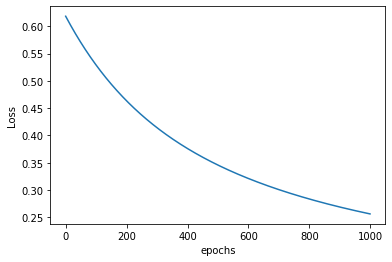

In [12]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

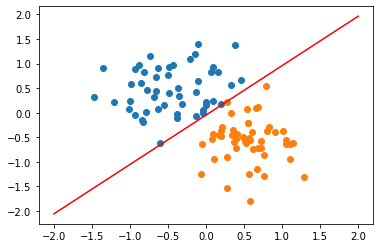

In [13]:
plot_fit('Trained Model')

red point positive prob:0.9424158334732056
black point positive prob:0.05055497586727142
red point in class:1
black point in class:0


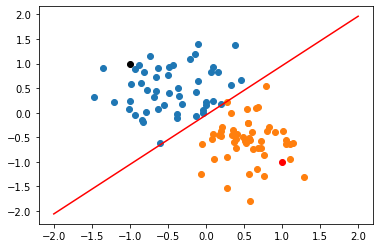

In [14]:
point1=torch.Tensor([1.0,-1.0])
point2=torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'ro')
plt.plot(point2.numpy()[0],point2.numpy()[1],'ko')
print("red point positive prob:{}".format(model.forward(point1).item()))
print("black point positive prob:{}".format(model.forward(point2).item()))

print("red point in class:{}".format(model.predict(point1)))
print("black point in class:{}".format(model.predict(point2)))
plot_fit('Trained Model')
